<a href="https://colab.research.google.com/github/JORDANGAMBA99/Data-Science-Projects/blob/main/Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

**Loading the dataset**

In [2]:
df = pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [5]:
df.drop(['Id'],axis=1,inplace=True)

In [6]:
df['Species'] = df['Species'].str.replace('Iris-',"")

**EDA**

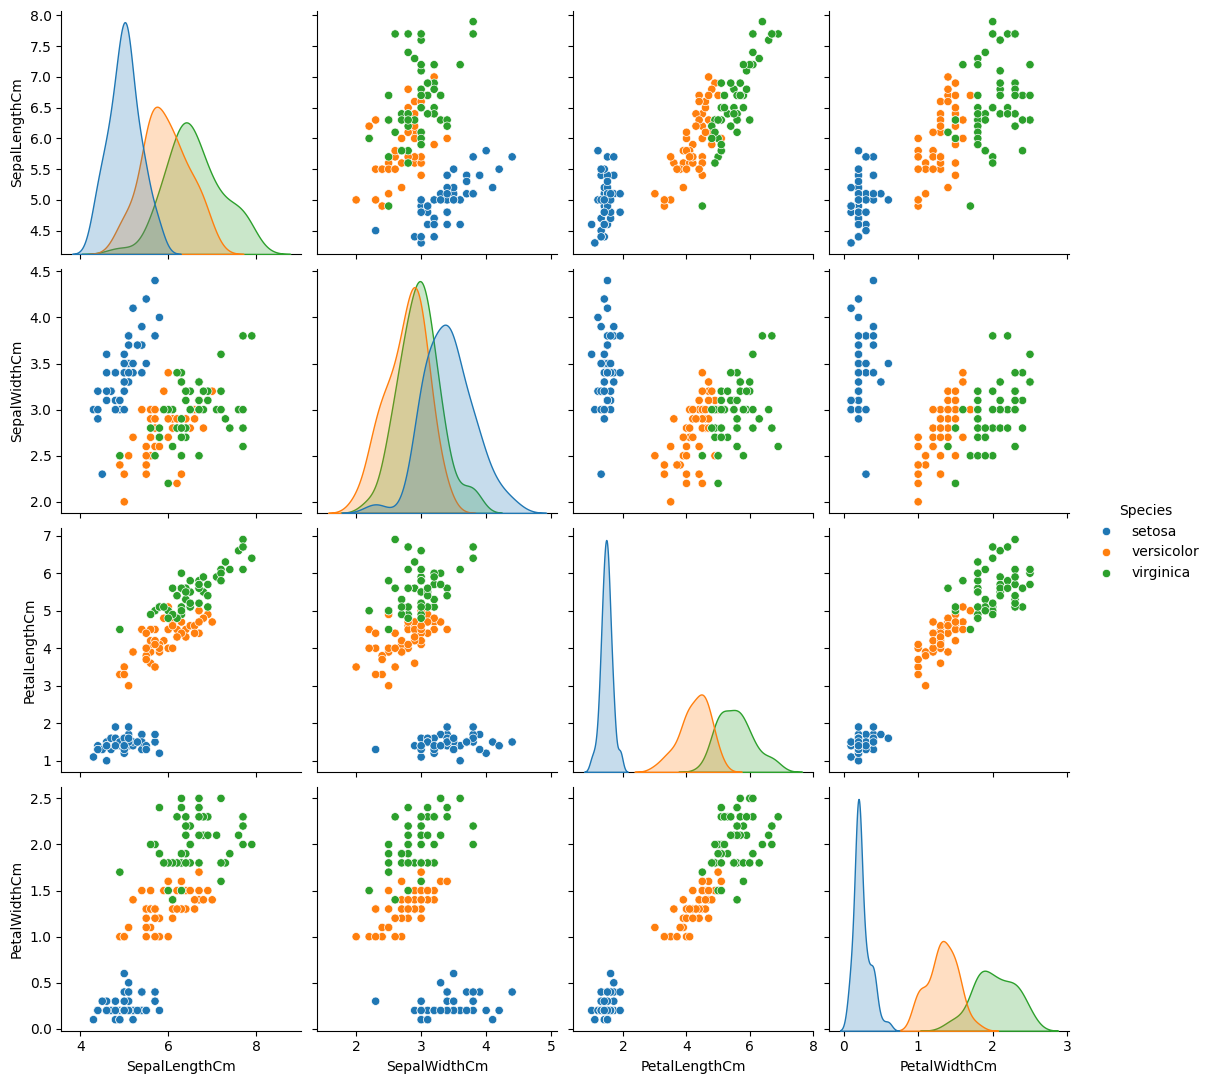

In [7]:
sns.pairplot(df,hue='Species',height=2.75)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(),annot=True)

In [10]:
df['Species_Num'] = df['Species']

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [12]:
df['Species'].value_counts()

,count
Species,
setosa,50
versicolor,50
virginica,50


In [13]:
df['Species_Num'] = df['Species_Num'].str.replace('setosa','1')
df['Species_Num'] = df['Species_Num'].str.replace('versicolor','2')
df['Species_Num'] = df['Species_Num'].str.replace('virginica','3')

In [14]:
df['Species'] = df['Species'].str.replace('setosa','1')
df['Species'] = df['Species'].str.replace('versicolor','2')
df['Species'] = df['Species'].str.replace('virginica','3')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [16]:
df['Species_Num'] = pd.to_numeric(df['Species_Num'],downcast='integer')
df['Species'] = pd.to_numeric(df['Species'],downcast='integer')

<Axes: >

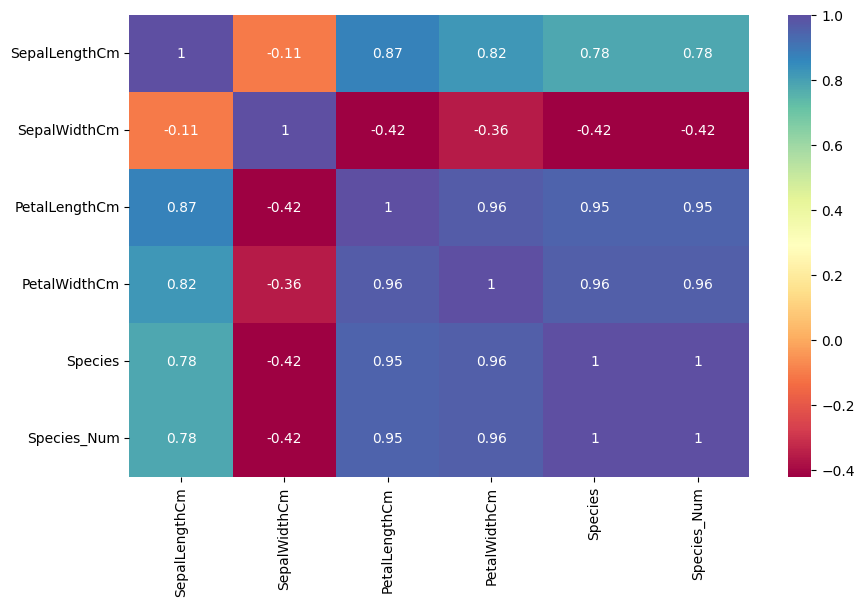

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Spectral',annot=True)

In [18]:
df.drop(['PetalLengthCm','Species_Num'],axis=1,inplace=True)

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,5.1,3.5,0.2,1
1,4.9,3.0,0.2,1
2,4.7,3.2,0.2,1
3,4.6,3.1,0.2,1
4,5.0,3.6,0.2,1


**Decision Tree Modelling**

In [20]:
X = df.drop(['Species'],axis=1)
y = df.Species

In [21]:
df['Species'] = df['Species'].replace(1,'setosa')
df['Species'] = df['Species'].replace(2,'versicolor')
df['Species'] = df['Species'].replace(3,'virginica')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalWidthCm   150 non-null    float64
 3   Species        150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_model = DecisionTreeClassifier()

In [27]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dt_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
print('Accuracy Score',accuracy_score(y_test,y_pred))

Accuracy Score 0.9736842105263158


In [31]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt_model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cv_scores = cross_val_score(estimator=dt_model,X=X_train,y =y_train,cv=10)
cv_scores.mean()

np.float64(0.8825757575757575)

In [36]:
cv_scores

array([0.91666667, 1.        , 1.        , 1.        , 0.63636364,
       0.90909091, 0.90909091, 0.81818182, 0.90909091, 0.72727273])

In [37]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted label')

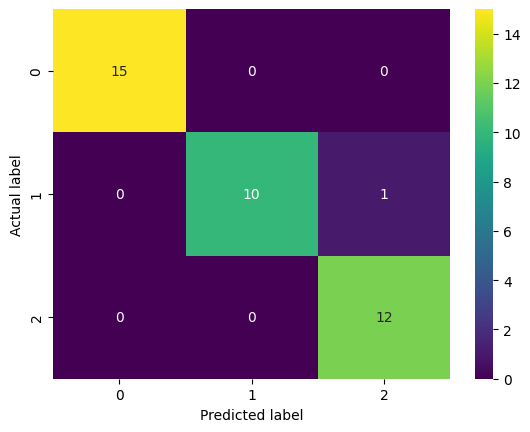

In [38]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix,annot=True,cmap='viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.91      0.95        11
           3       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [40]:
from sklearn import tree

In [41]:
list(df.columns[:-1])

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']

In [42]:
features = list(df.columns[:-1])
targets =['setosa','versicolor','virginica']
print(features)
print(targets)

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']
['setosa', 'versicolor', 'virginica']


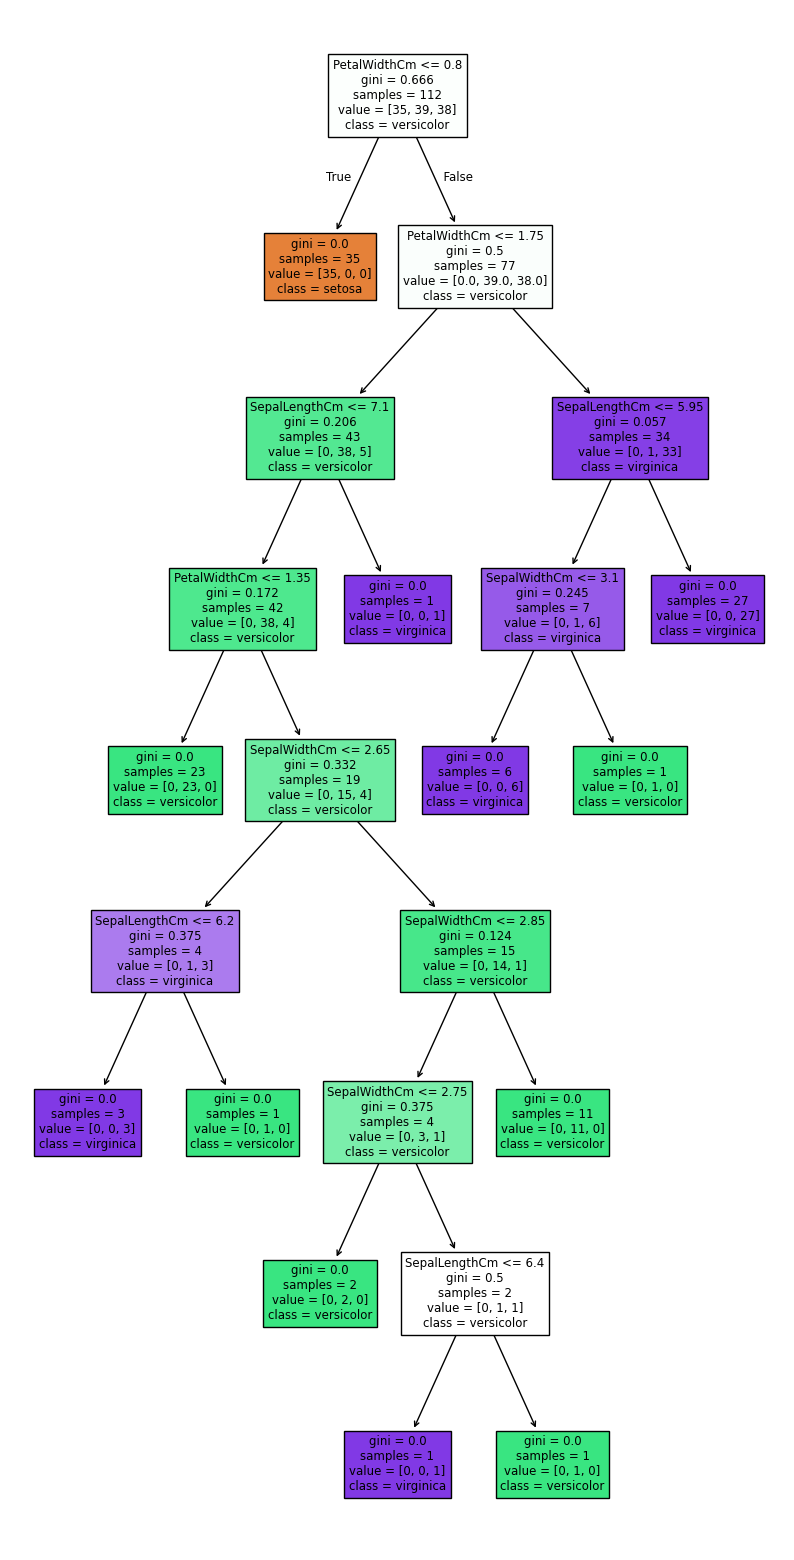

In [43]:
plt.figure(figsize=(10,20))
tree2 = tree.plot_tree(dt_model,filled=True,feature_names =features,class_names = targets)

**Hyperparameter Optimization with Python**

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
dt_model2 = DecisionTreeClassifier()

In [46]:
dt_params = {'criterion':['gini','entropy'],
             'max_depth':np.arange(2,14,2),
             'max_features':['auto','sort','log2']}

In [47]:
dt_cv_model = GridSearchCV(estimator = dt_model2,param_grid = dt_params,cv=10)

In [48]:
dt_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sort', 'log2']})

In [49]:
dt_cv_model.best_params_

{'criterion': 'gini', 'max_depth': np.int64(10), 'max_features': 'log2'}

In [50]:
dt_tuned = DecisionTreeClassifier(criterion = 'gini',max_depth = 6,max_features='sqrt')

In [51]:
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt')

In [52]:
y_pred = dt_tuned.predict(X_test)

In [53]:
print("Accuracy_Score :",accuracy_score(y_test,y_pred))

Accuracy_Score : 0.9473684210526315


In [54]:
cv_scores = cross_val_score(estimator=dt_model,X=X_train,y =y_train,cv=10)
cv_scores.mean()

np.float64(0.8734848484848483)

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_model = RandomForestClassifier()

In [58]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
y_model = rf_model.predict(X_test)

In [61]:
print('Accuracy Score',accuracy_score(y_test,y_pred))

Accuracy Score 0.9473684210526315


In [62]:
cv_scores = cross_val_score(estimator=rf_model,X=X_train,y =y_train,cv=10)
cv_scores.mean()

np.float64(0.9015151515151514)

In [63]:
print(confusion_matrix(y_test,y_pred))

[[13  2  0]
 [ 0 11  0]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted label')

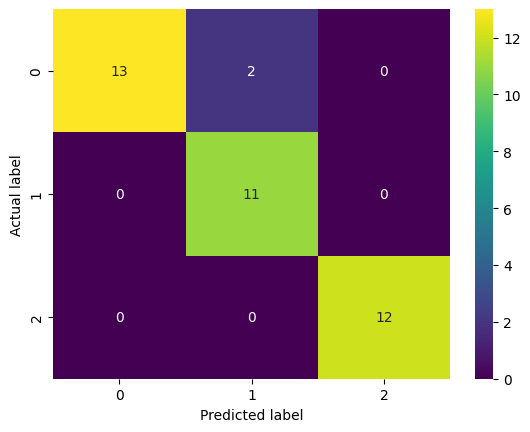

In [64]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix,annot=True,cmap='viridis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.85      1.00      0.92        11
           3       1.00      1.00      1.00        12

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



In [66]:
rf_model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1574985290),
 DecisionTreeClassifier(max_features='sqrt', random_state=1658272604),
 DecisionTreeClassifier(max_features='sqrt', random_state=989611766),
 DecisionTreeClassifier(max_features='sqrt', random_state=1430145820),
 DecisionTreeClassifier(max_features='sqrt', random_state=1554243871),
 DecisionTreeClassifier(max_features='sqrt', random_state=139754824),
 DecisionTreeClassifier(max_features='sqrt', random_state=834473810),
 DecisionTreeClassifier(max_features='sqrt', random_state=799790143),
 DecisionTreeClassifier(max_features='sqrt', random_state=202094489),
 DecisionTreeClassifier(max_features='sqrt', random_state=1154331291),
 DecisionTreeClassifier(max_features='sqrt', random_state=1042223236),
 DecisionTreeClassifier(max_features='sqrt', random_state=2135366500),
 DecisionTreeClassifier(max_features='sqrt', random_state=316222101),
 DecisionTreeClassifier(max_features='sqrt', random_state=2018617208),
 DecisionTre

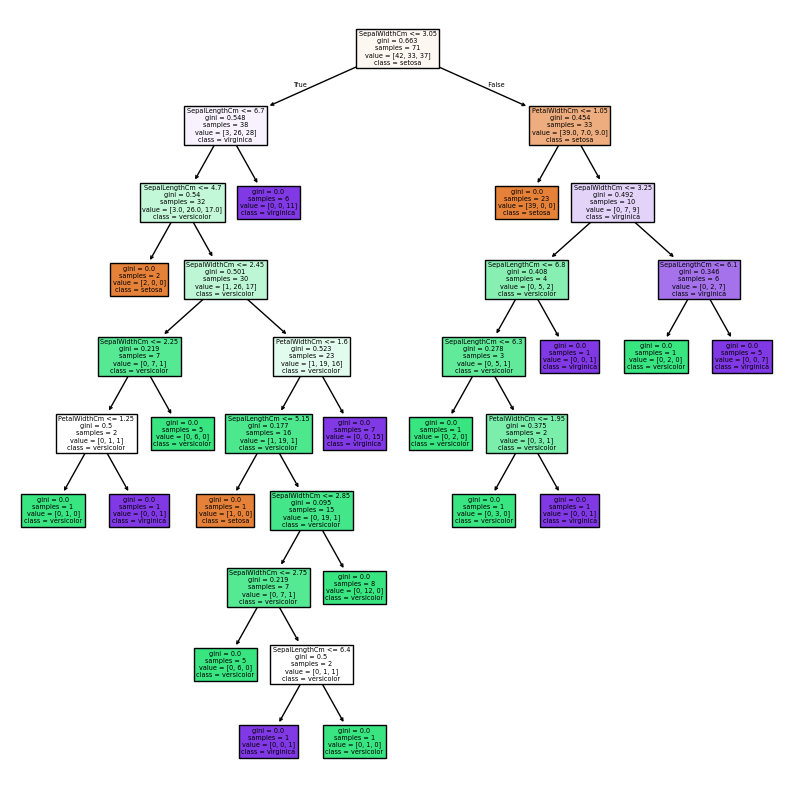

In [68]:
plt.figure(figsize=(10,10))
tree2 = tree.plot_tree(rf_model.estimators_[0],filled=True,feature_names =features,class_names = targets)

**Hyperparameter Optimization with Python**

In [69]:
rf_model2 = RandomForestClassifier()

In [75]:
rf_params = {
    'n_estimators' :[50,100,300],
    'max_depth' :[3,5,7],
    'max_features' : [2,4,6,8],
    'min_samples_split' : [2,4,6]}